In [123]:
import kagglehub

path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\janiobachmann\bank-marketing-dataset\versions\1


In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [125]:
marketing2 = pd.read_csv('C:/Users/Asus/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1/bank.csv')
marketing2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [126]:
#deposit,ürünü satın alıp almadığını ifade ediyor.Bizim bulmak istediğimiz
marketing2['deposit']=marketing2['deposit'].map({'yes': 1, 'no': 0})

marketing2 = pd.get_dummies(marketing2, drop_first=True)

İlk satırda, map fonksiyonu ile deposit sütunundaki "yes" ve "no" değerleri sırasıyla 1 ve 0 ile değiştirilerek bu sütun sayısal bir formata dönüştürüldü.deposit Sütunu: Bu sütun hedef değişken(y)'dir. "yes" değerini 1'e, "no" değerini 0'a çevirdik.

İkinci satırda, pd.get_dummies ile kategorik değişkenler birden fazla sütuna ayrıldı (one-hot encoding yapıldı) ve drop_first=True ile gereksiz bir sütun (referans sütun) düşürüldü.

In [127]:
# Bağımsız ve bağımlı değişkenleri ayırma
X = marketing2.drop('deposit', axis=1)  
y = marketing2['deposit']             

X değişkeni ile veri setindeki bağımsız değişkenler, yani deposit dışındaki tüm sütunlar seçildi.
y değişkeni ile bağımlı değişken olan deposit sütunu seçilerek tahmin edilmesi gereken hedef değişken belirlendi.

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Veriler, train_test_split fonksiyonu kullanılarak train ve test seti olarak ayrıldı; verinin %30’u test seti olarak belirlendi (test_size=0.3).
random_state=42 parametresi, aynı verilerin tekrar bölünmesinde tutarlılık sağlamak için rastgelelik kontrolü yaptı.

In [129]:
X_train
#x'in %70'lik kısmını içerir.

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
7968,57,950,9,1272,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1456,34,925,13,709,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
361,41,75,1,479,9,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
812,46,4414,18,504,7,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1092,28,4465,28,769,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,761,11,80,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
5191,28,159,16,449,2,33,4,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5390,35,1144,20,197,13,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
860,51,746,25,372,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [130]:
y_train
#y'nin %70'lik kısmını içerir.

7968    0
1456    1
361     1
812     1
1092    1
       ..
5734    0
5191    1
5390    0
860     1
7270    0
Name: deposit, Length: 7813, dtype: int64

In [131]:
# Karar ağacı modelini oluşturma ve eğitme
decision_tree_model= DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [132]:
X_test
#X'in %30'luk kısmını içerir (eğitim setine ayrılan %70'lik kısmın dışında kalan kısım).

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
5527,65,744,5,182,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4541,38,1627,16,1323,9,-1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1964,35,4963,14,456,1,300,1,True,False,False,...,False,False,False,True,False,False,False,False,False,False
5007,47,8229,8,784,2,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
8928,35,1473,12,84,3,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,30,495,21,641,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
10702,44,12,19,126,2,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
10466,44,1945,14,191,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
8809,55,505,17,58,1,316,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [133]:
y_test
#y'nin %30'luk kısmını içerir (eğitim setine ayrılan %70'lik kısmın dışında kalan kısım).

5527     0
4541     1
1964     1
5007     1
8928     0
        ..
1052     1
10702    0
10466    0
8809     0
99       1
Name: deposit, Length: 3349, dtype: int64

In [134]:
decision_tree_model.predict(X_test)

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

tree_clf.predict(X_test),eğitimli karar ağacı modelinin (tree_clf) test verisi olan X_test üzerinde tahmin yapmasını sağlar.

Modelin X_test verisi için her bir örneğin y_test değerini tahmin etmesine olanak tanır.
Sonuç olarak, modelin doğru etiketleri tahmin etme başarısı ölçülür.

In [135]:
# Test seti üzerinde tahminler.KARAR AĞACI İÇİN
y_pred_tree =decision_tree_model.predict(X_test)

# Model performansını değerlendirme
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print("Accuracy(Doğruluk):", accuracy_tree)
print("Classification Report:\n", report_tree)


Accuracy(Doğruluk): 0.78501045088086
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1742
           1       0.78      0.77      0.77      1607

    accuracy                           0.79      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.79      0.78      3349



In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

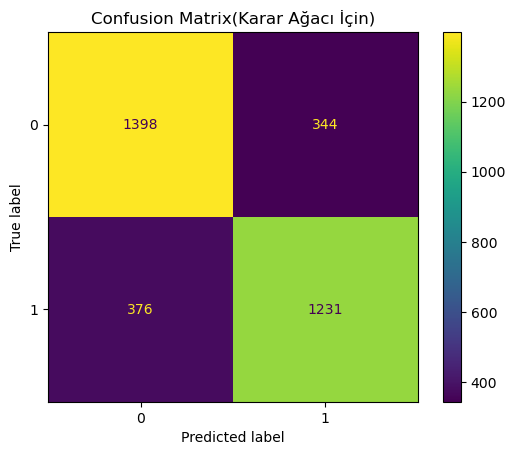

In [137]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=decision_tree_model.classes_)
disp_tree.plot()
plt.title("Confusion Matrix(Karar Ağacı İçin)")
plt.show()

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Performans metriklerini hesapla
accuracy_decision_tree_model = accuracy_score(y_test, decision_tree_model.predict(X_test))
print("Karar Ağacı Doğruluk:",accuracy_decision_tree_model)

Karar Ağacı Doğruluk: 0.78501045088086


Karar ağacı modelinin doğruluğu %78.5 iken, lojistik regresyonun doğruluğu %71.2 idi. Bu, karar ağacının daha yüksek doğrulukla(accuracy) tahmin yaptığı anlamına gelir.
Karar ağacı genellikle daha yüksek doğruluk ve daha iyi genel performans gösteriyor, özellikle 0 sınıfı için.
Lojistik regresyon ise daha yüksek precision değeriyle 1 sınıfında daha başarılı, ancak genel doğruluk ve F1-Score açısından karar ağacına göre daha düşük performans sergiliyor.